# **Question 2:**

In [34]:
import numpy as np
import sys
import matplotlib.pyplot as plt

For modeling this problem, we need to determine states, actions, and rewards.

**State:** The gambler’s capital, s ∈ {1, 2, . . . , 99}

**Actions:** The stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 

**Rewards:** The reward is zero on all transitions except those on which the gambler reaches his goal, which is +1.

Next, I implement a function to calculate the **value** for all actions in a state. This function gets the gambler's capital, the values at each state, the reward vector, and returns the expected value of each action. 

This function uses the **Bellman equation**: The expected value of the action is the sum of immediate rewards and the value of the next state: 

Rewards[Capital+Stake] and Rewards[Capital-Stake] are the **immediate rewards.**

Values[Capital+Stake]and Values[Capital-Stake] are **values** of the next states.

In [35]:
def Action_Value_Calc(p_h, discount_factor, Capital, V, rewards):

        Expected_Values = np.zeros(101)
        possible_stakes = range(1, min(Capital, 100-Capital)+1)
        for Stake in possible_stakes:
            Expected_Values[Stake] = p_h * (rewards[Capital+Stake] + V[Capital+Stake]*discount_factor) + (1-p_h) * (rewards[Capital-Stake] + V[Capital-Stake]*discount_factor)
        return Expected_Values

Next, I implement the value iteration function as below. 

First, I define a stopping value, which I will update at the end of each iteration. The algorithm stops when the difference between the new and old state values is smaller than a threshold.

In each iteration, I go through all the states, and for each state I calculate all the action values for all possible actions, and choose the best action value as the new state value. 

After all the state values have been updated, I create the optimal policy by using the maximum calculated values.

In [36]:
def Value_Iteration(p_h, threshold , discount_factor):

    rewards = np.zeros(101)
    rewards[100] = 1 
    values = np.zeros(101)
    
    while True:
        condition_val = 0
        for state in range(1, 100):
            Action_values = Action_Value_Calc(p_h, discount_factor, state, values, rewards)
            best_action_value = np.max(Action_values)
            condition_val = max(condition_val, np.abs(best_action_value - values[state]))
            values[state] = best_action_value        
        if condition_val < threshold:
            break
    
    policy = np.zeros(100)
    for state in range(1, 100):
        Action_values = Action_Value_Calc(p_h, discount_factor, state, values, rewards)
        best_action = np.argmax(Action_values)
        policy[state] = best_action
    
    return policy, values

Next, for better understanding of the results, I define two functions for graphic visualizations.

The first function plots **Value Estimates** for different Capital values as below:

In [58]:
def plot_values(values):
  x = range(100)
  y = values[:100]
  plt.plot(x, y)
  plt.xlabel('Capital')
  plt.ylabel('Value Estimates')
  plt.title('Value Estimates-Capital')
  plt.show()

The second function plots the **Final Policy** for different Capitals:

In [59]:
def plot_policy(policy):
  x = range(100)
  y = policy
  plt.bar(x, y)
  plt.xlabel('Capital')
  plt.ylabel('Final Policy')
  plt.title('Final Policy-Capital')
  plt.show()

Results for **p_h = 0.25**:

Policy: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
Value Functions: [0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.93035477e-02 8.37541372e-02
 8.96225423e-02 9.5

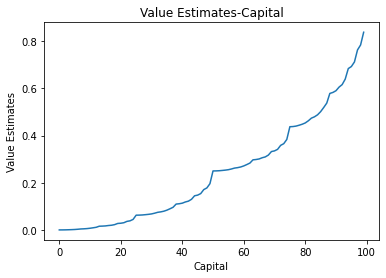

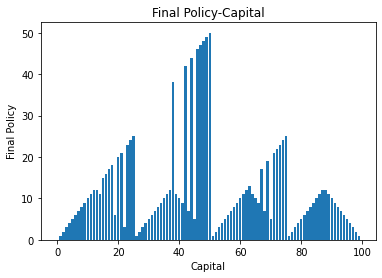

In [60]:
Stopping_Threshold = 0.0001
discount_factor = 1.0
p_h = 0.25
policy, values = Value_Iteration(p_h, Stopping_Threshold , discount_factor)
print("Policy:", policy)
print("Value Functions:", values)
plot_values(values)
plot_policy(policy)

Results for **p_h = 0.55**:

Policy: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37.  1. 14. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25.  2.  4.  3. 17.  7.  6.  7.  8.  9. 10. 11. 12.  1.  2.
  9.  4.  5.  6.  5.  3.  3.  1.  2.  1.]
Value Function: [0.         0.00999999 0.02       0.03       0.04       0.05
 0.06       0.07       0.08       0.09       0.1        0.11
 0.12       0.13       0.14       0.15       0.16       0.17
 0.18       0.19       0.2        0.21       0.22       0.23
 0.24       0.25       0.26       0.27       0.28       0.29
 0.3        0.31       0.32       0.33       0.34       0.35
 0.36       0.37       0.38       0.39       0.4        0.41
 0.42       0.43       0.44       0.45       0.46       0.47
 0.48       0.49       0.5        0.51       0.52       0.53
 0.54       0.55    

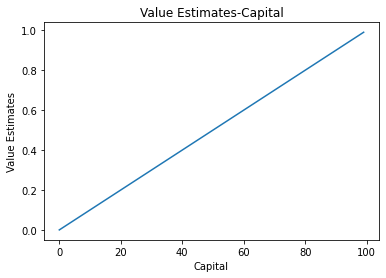

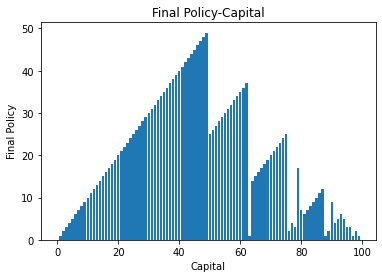

In [61]:
Stopping_Threshold = 0.0001
discount_factor = 1.0
p_h = 0.5
policy, values = Value_Iteration(p_h, Stopping_Threshold, discount_factor)
print("Policy:", policy)
print("Value Function:", values)
plot_values(values)
plot_policy(policy)